# Sentiment Analysis VADER - Airline

<br>

<img src = "https://img.freepik.com/vetores-gratis/ilustracao-do-conceito-de-analise-de-sentimento_114360-5182.jpg?t=st=1647317146~exp=1647317746~hmac=9b747d107021265b6937bf4bd8dbe3a0d2ea04fdbfe1afc6ce773add5d463537&w=740">

<br>

Um trabalho de análise de sentimentos sobre os problemas de cada grande companhia aérea dos EUA. Os dados do Twitter foram extraídos de fevereiro de 2015 e os colaboradores foram solicitados a classificar primeiro os tweets positivos, negativos e neutros, seguidos pela categorização de motivos negativos (como "vôo atrasado" ou "serviço rude").

Por exemplo, ele contém se o sentimento dos tweets neste conjunto foi positivo, neutro ou negativo para seis companhias aéreas dos EUA:

As informações dos principais atributos para este projeto são as seguintes;

* **`alirline_sentiment`** : classificação de sentimento. (positiva, neutra e negativa)
* **`negativereason`** : Motivo selecionado para a opinião negativa
* **`airline`** : Nome de 6 companhias aéreas dos EUA ('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American')
* **`texto`** : Opinião do cliente

<br>

In [21]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [22]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [23]:
# NLTK para NLP
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

re        : 2.2.1
watermark : 2.3.0
pandas    : 1.2.4
seaborn   : 0.11.1
plotly    : 5.6.0
numpy     : 1.20.1
matplotlib: 3.3.4
nltk      : 3.6.1



In [25]:
# Configuração para os gráficos largura e layout dos graficos

plt.style.use('fivethirtyeight')

# Base dados

In [26]:
df = pd.read_csv("Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [27]:
# Exibido 5 primeiros dados
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [28]:
# Exibido 5 últimos dados 
df.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [29]:
# Número de linhas e colunas
df.shape

(14640, 15)

In [30]:
# Tipo dos dados
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [31]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 14640
Números de colunas: 15


In [32]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   61962


In [33]:
# Verificando o total de sentimentos
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Análise de dados

In [34]:
# Verificando o total de sentimentos

df_x = df.airline_sentiment.value_counts().sort_values()
df_x

positive    2363
neutral     3099
negative    9178
Name: airline_sentiment, dtype: int64

In [35]:
# Ajutando os dados de Companhias áreas
da = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
da

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [36]:
# Print dos dados negativos

print(df.negativereason.unique())
print(df[df.negativereason == '']['airline_sentiment'].unique())
print(df[df.negativereason != '']['airline_sentiment'].unique())

[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']
[]
['neutral' 'positive' 'negative']


In [37]:
# Fazendo um display nos dados

df_neg = df[df.airline_sentiment == 'negative']
display(df_neg.shape, df_neg.head())

(9178, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


Text(0, 0.5, 'Total')

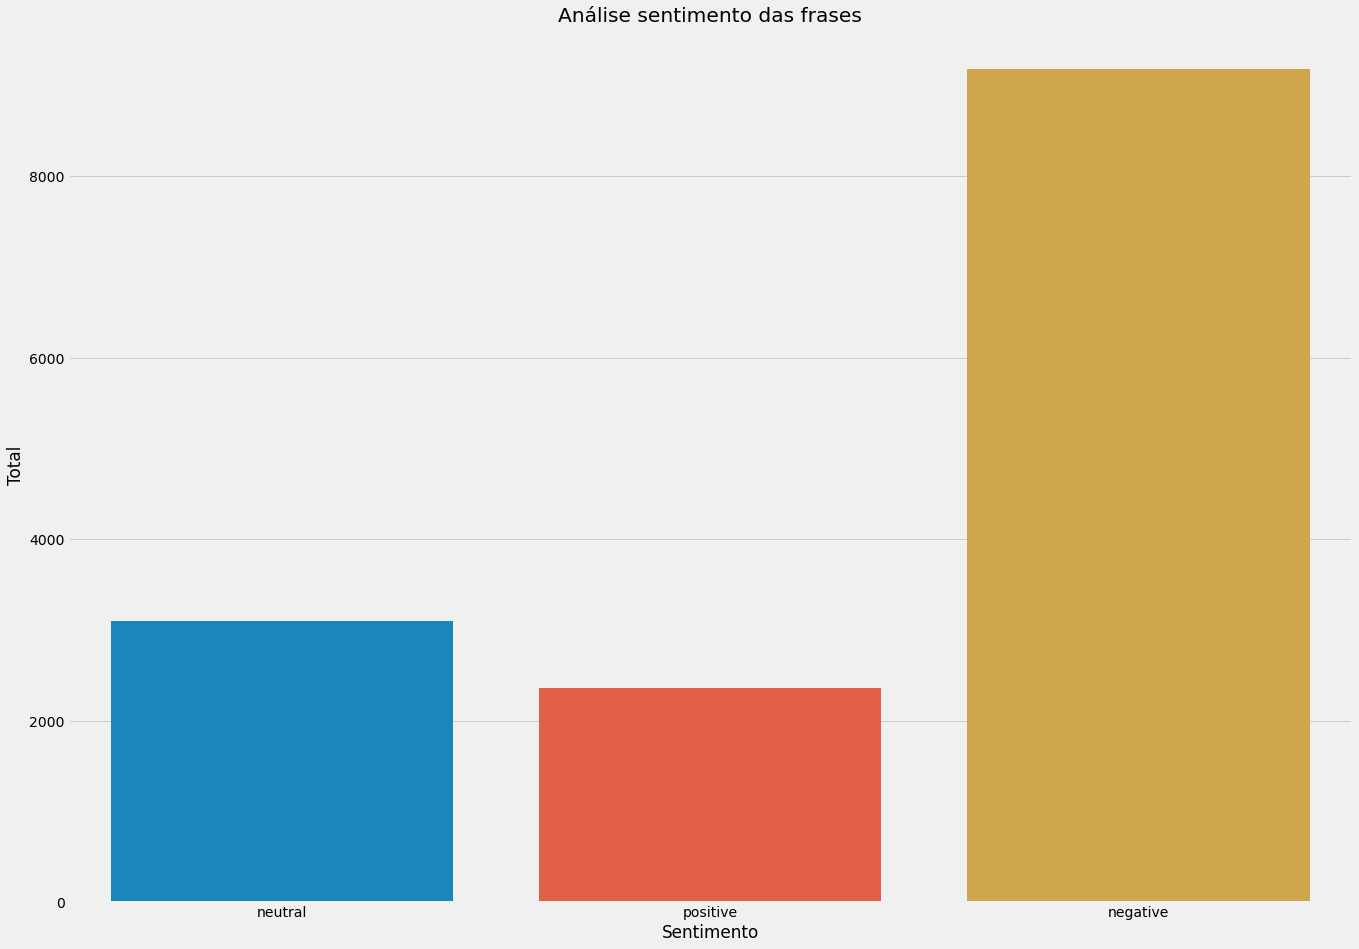

In [38]:
plt.figure(figsize=(20.5, 15))

plt.title("Análise sentimento das frases")
ax = sns.countplot(df["airline_sentiment"])
plt.xlabel("Sentimento")
plt.ylabel("Total")

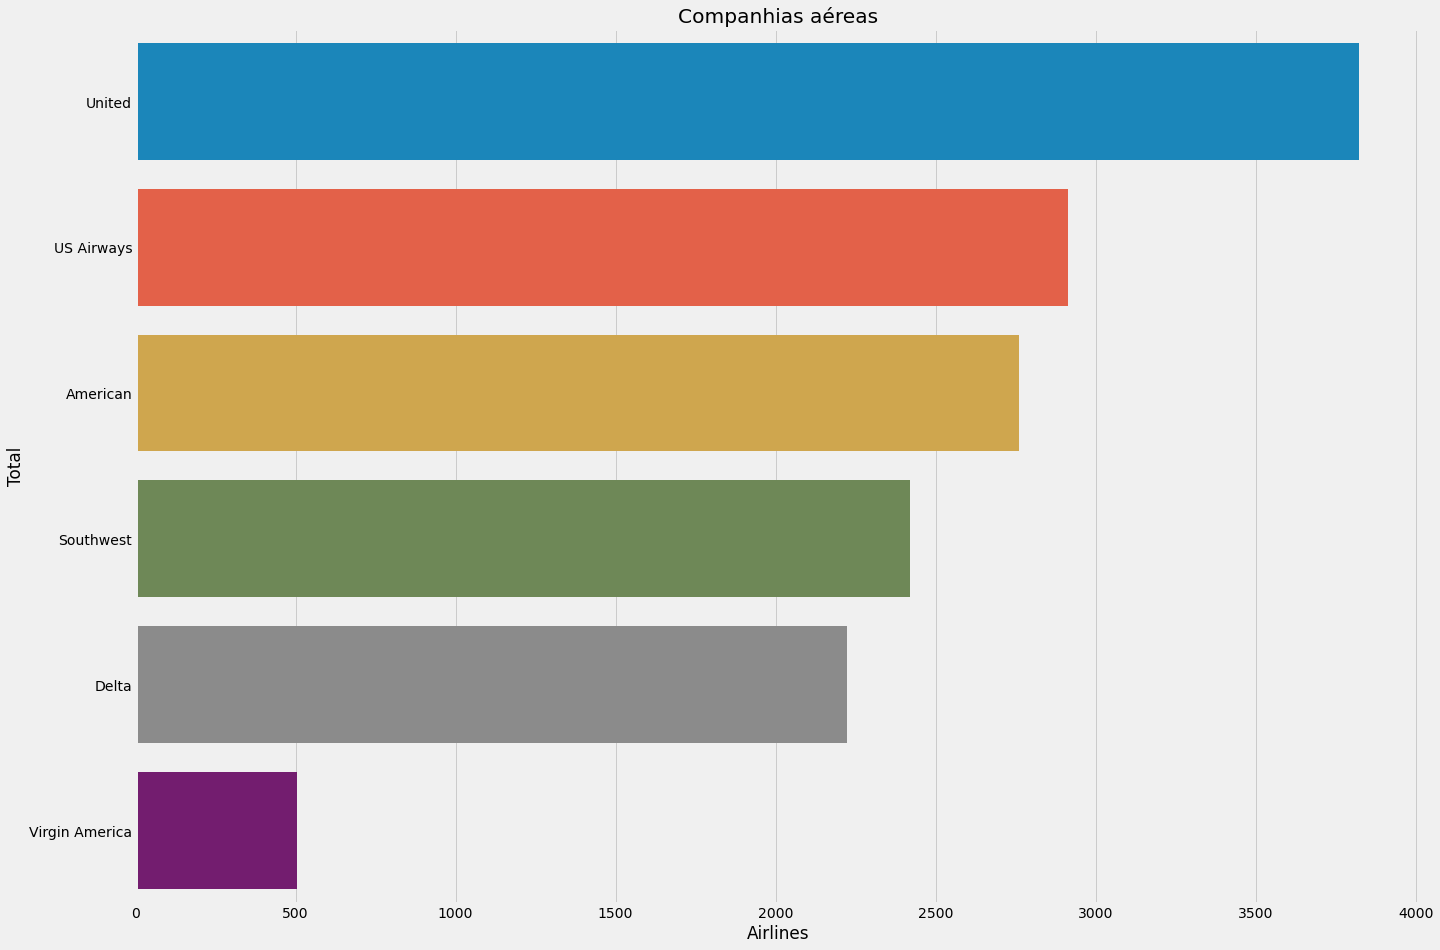

In [39]:
plt.figure(figsize=(20.5, 15))

ax = sns.countplot(data = df, y = 'airline',
                   order = df.airline.value_counts().index)
plt.title('Companhias aéreas')
plt.xlabel("Airlines")
plt.ylabel("Total")
plt.show()

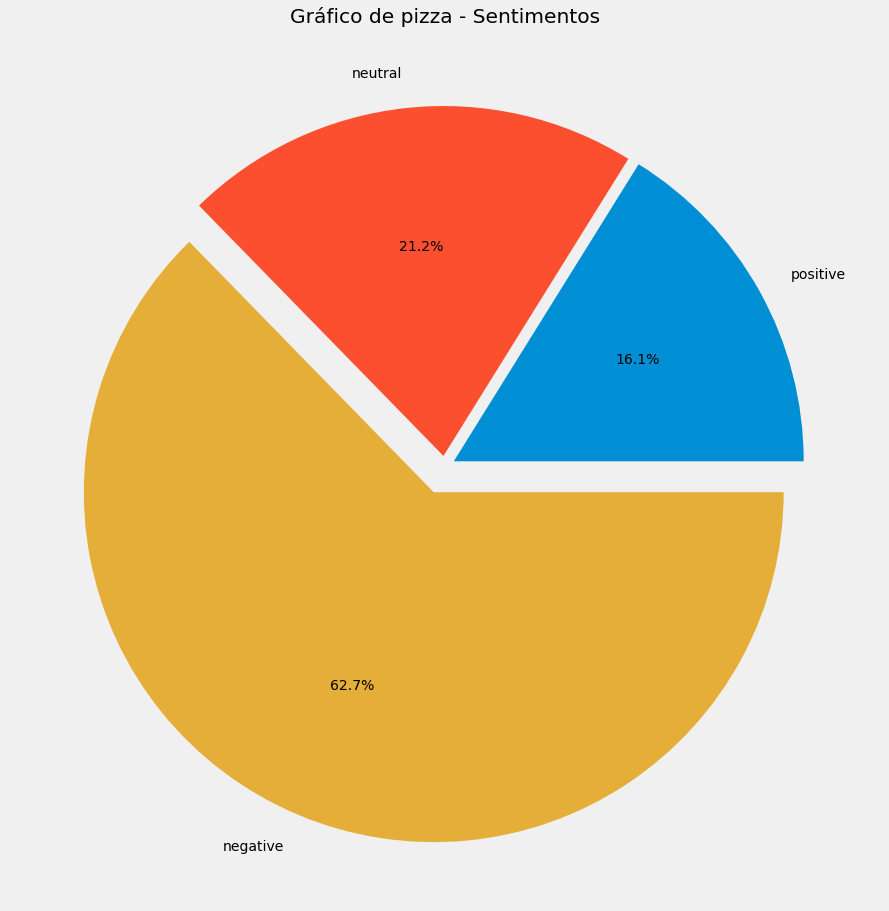

In [42]:
plt.figure(figsize=(20.5, 15))

ax = plt.pie(x = df_x, labels=df_x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Gráfico de pizza - Sentimentos')

plt.show()

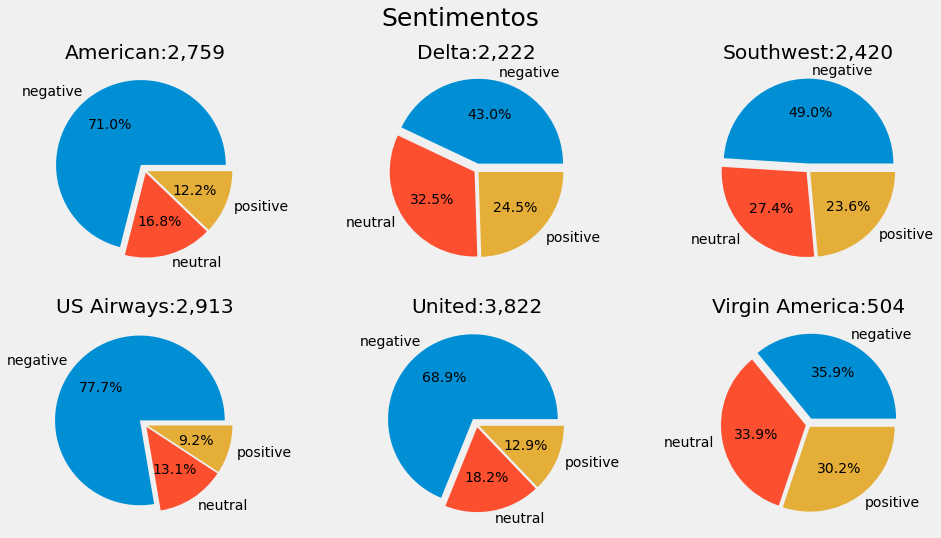

In [43]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()

for i, ax in zip(range(0, 6), axes):
    temp = da.iloc[i]    
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{da.index[i]}:{format(da.values[i].sum(),',')}")

plt.suptitle("Sentimentos", fontsize = 25)    
plt.show()

Text(0, 0.5, 'Total')

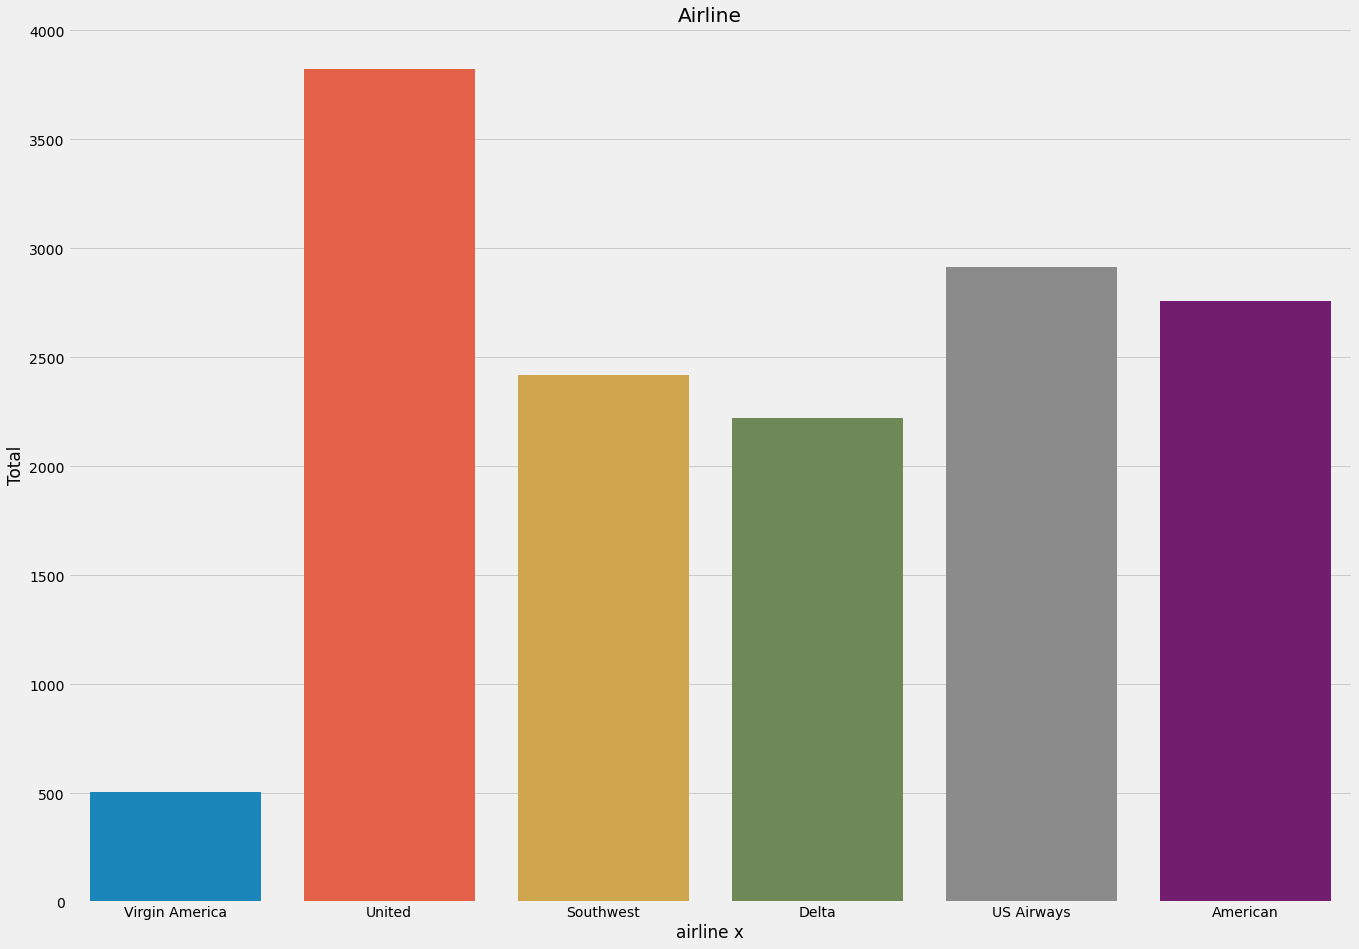

In [44]:
plt.figure(figsize=(20.5, 15))

plt.title("Airline")
ax = sns.countplot(df["airline"])
plt.xlabel("airline x")
plt.ylabel("Total")

<AxesSubplot:xlabel='airline'>

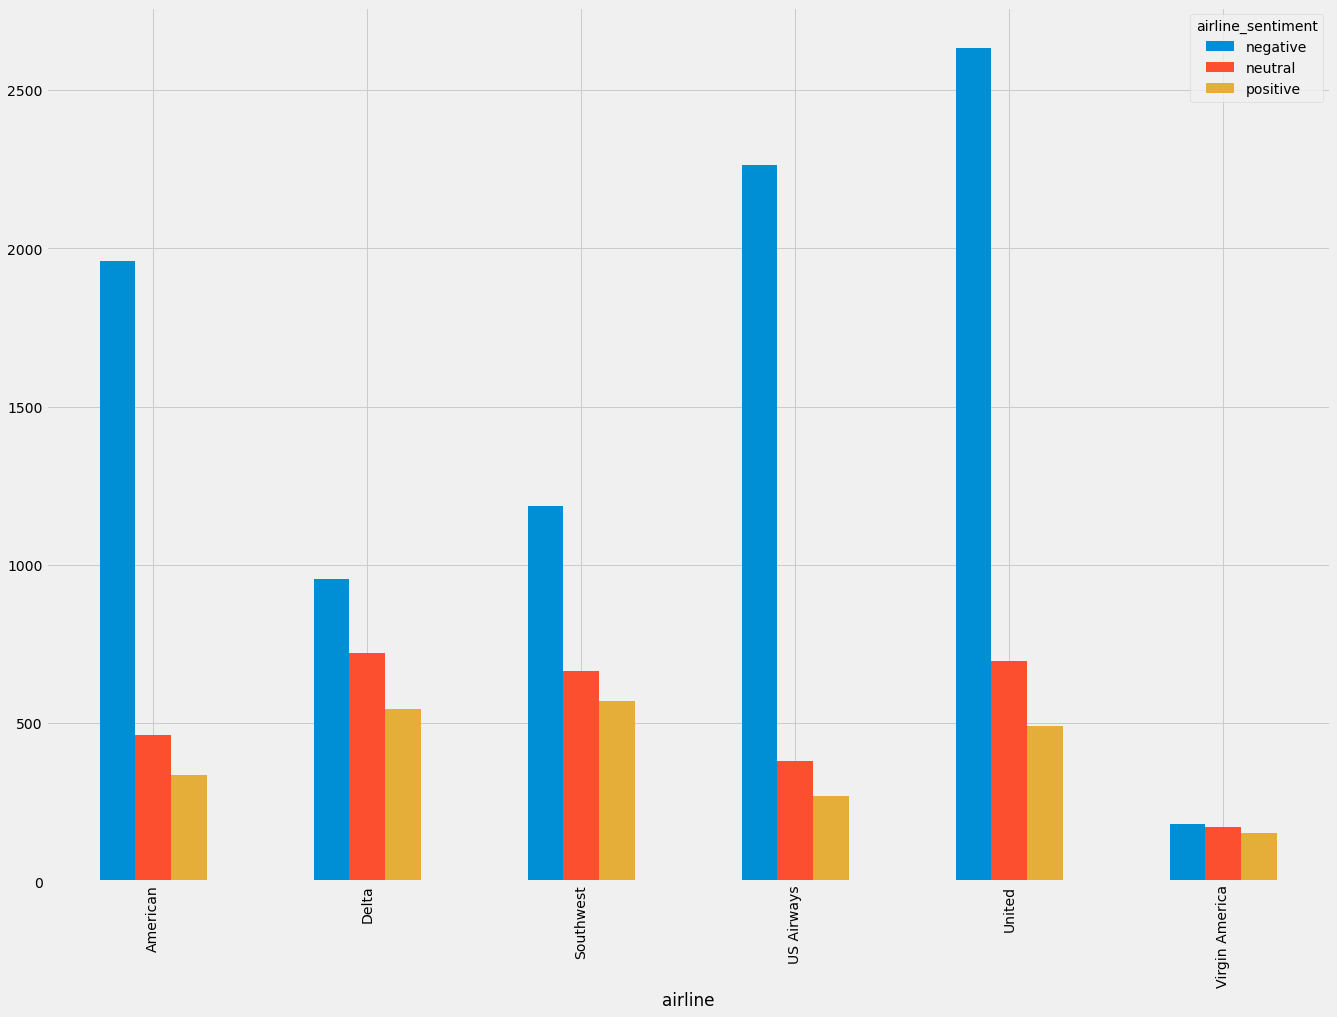

In [45]:
df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(20.5, 15))

Text(0, 0.5, 'Total')

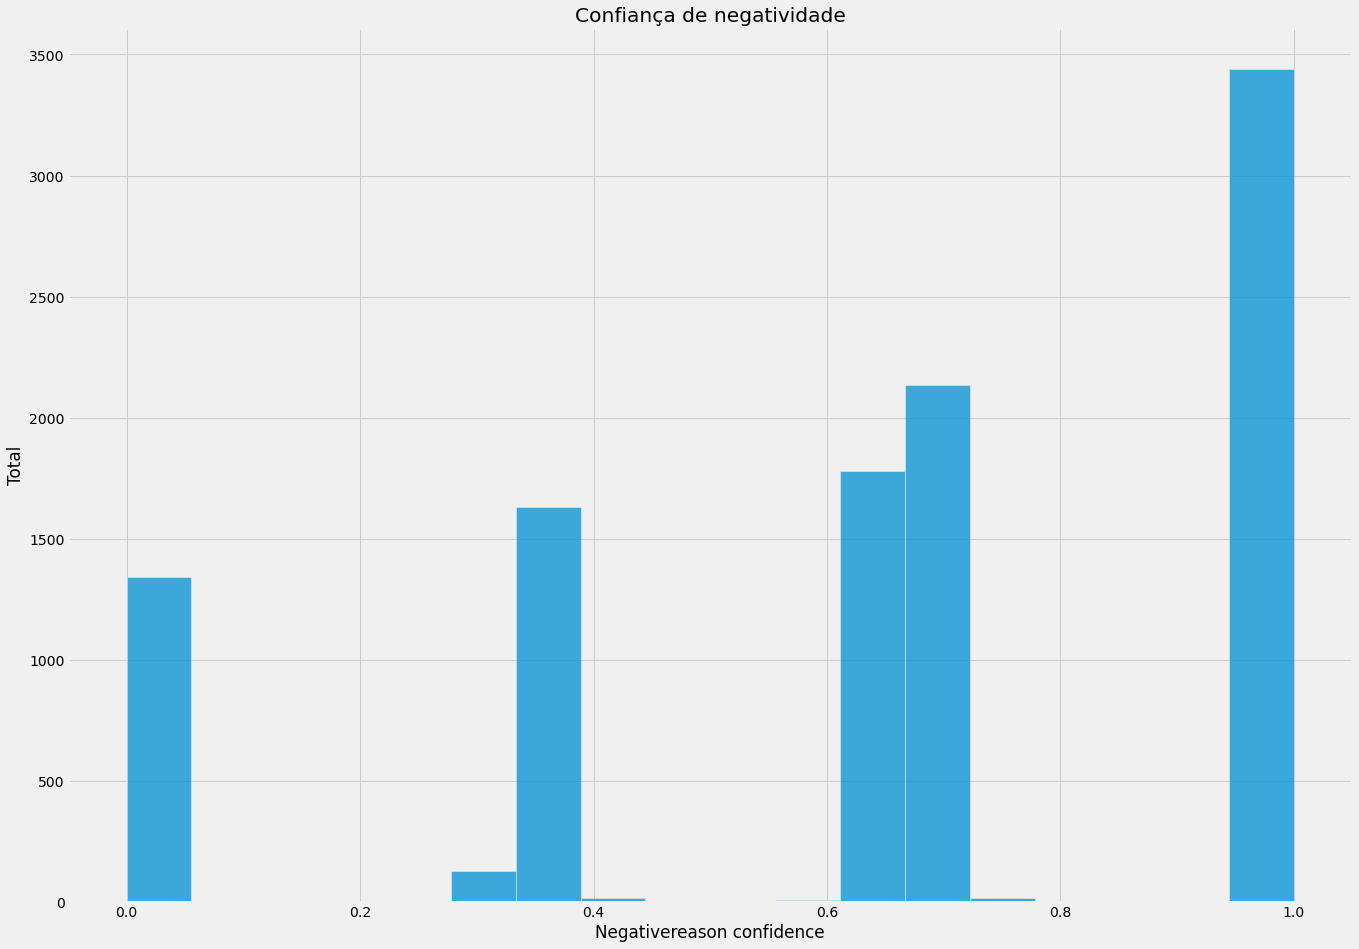

In [46]:
plt.figure(figsize=(20.5, 15))

sns.histplot(df["negativereason_confidence"])
plt.title("Confiança de negatividade")
plt.xlabel("Negativereason confidence")
plt.ylabel("Total")

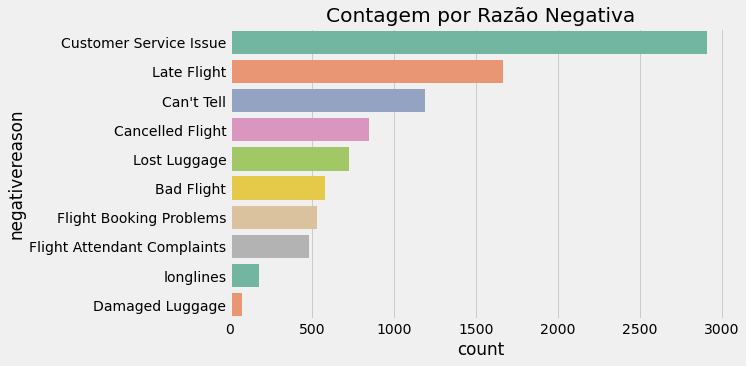

In [47]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df_neg, y = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index)
ax.set_title('Contagem por Razão Negativa')

plt.show()

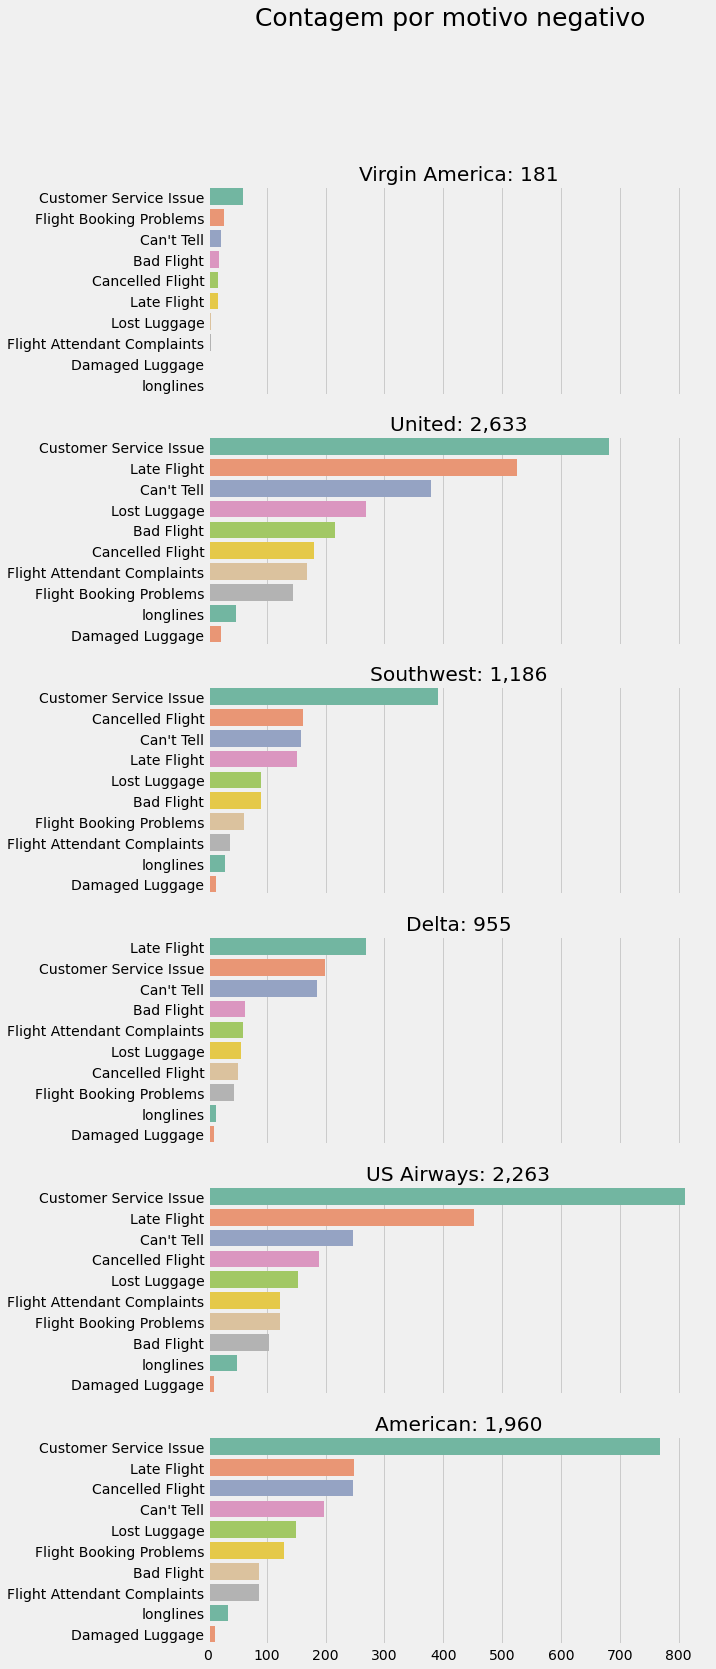

In [48]:
fig, axes = plt.subplots(6, 1, figsize=(8, 25), sharex=True)
axes = axes.flatten()
names = df_neg['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = df_neg[df_neg.airline==name], y = 'negativereason',
                       palette='Set2',
                       order = df_neg[df_neg.airline==name].negativereason.value_counts().index, ax = n)
    
    ax.set_title(f"{name}: {format(len(df_neg[df_neg.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("Contagem por motivo negativo", fontsize = 25)
plt.show()

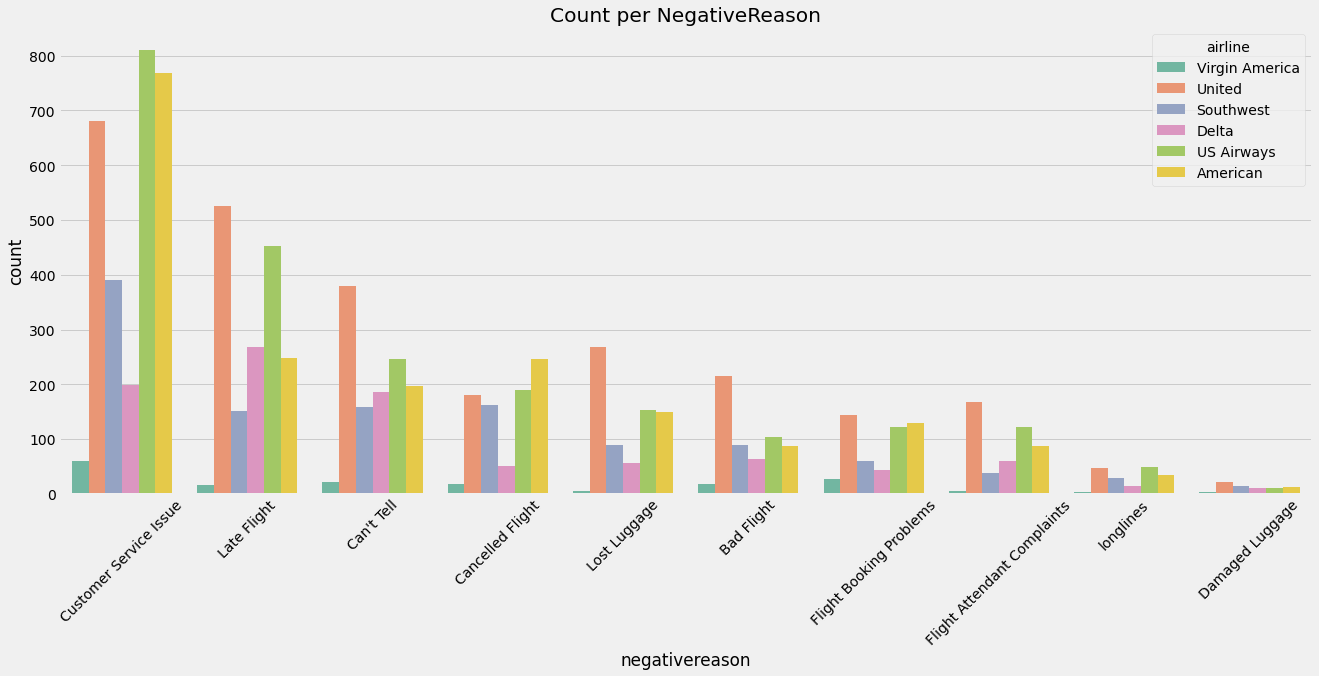

In [49]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df_neg, x = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index, hue = 'airline')

#ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')
plt.xticks(rotation=45)
plt.show()

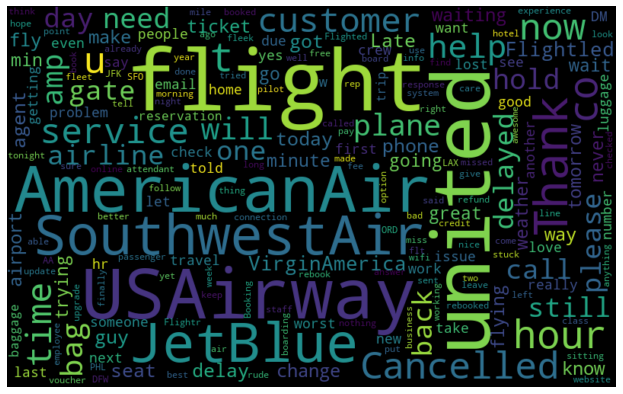

In [50]:
# Nuvem de palavras
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in df["text"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

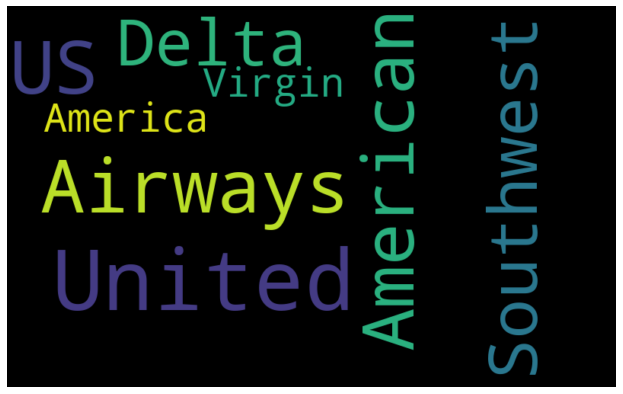

In [51]:
todos_palavras = ' '.join([texto for texto in df["airline"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Vader Sentiment

In [52]:
# Verificando as colunas do dataset

df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [53]:
# Definindo os dados para análise
df = df[['airline_sentiment', 'airline','text' ]]
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [54]:
# Definindo os dados para análise de dados da Companhia - United

df = df[df["airline"]=="United"]
df = df.reset_index(drop = True)

print(len(df))
df.head()

3822


,airline_sentiment,airline,text
0,positive,United,@united thanks
1,positive,United,@united Thanks for taking care of that MR!! Ha...
2,negative,United,@united still no refund or word via DM. Please...
3,negative,United,@united Delayed due to lack of crew and now de...
4,positive,United,@united thanks -- we filled it out. How's our ...


In [55]:
# Análise de sentimento nas frases

# Importando a biblioteca vader sentiment, sentiment intensity analyzer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Modelo da análise de sentimento
model = SentimentIntensityAnalyzer()

# Função das frases
def data_model(df):
    
    # Modelo polaridade e score das frases
    model_set = model.polarity_scores(df) 
    
    # Print análise de sentimento
    print("{:-<40} {}".format(df, str(model_set)))

# Verificando sentimento
data_model("O voo da United foi uma experiência ruim") 

O voo da United foi uma experiência ruim {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}


### Calculando a pontuação para cada tweet no dataframe/conjunto de dados

In [56]:
%time

x = 0

# Modelo
model_1 = []

# Lendo os dados do score
while(x<len(df)):
    
    # Modelo
    y = model.polarity_scores(df.iloc[x]['text'])
    
    # Armazenando no modelo
    model_1.append(y["compound"])
    x = x + 1
    
# Adicionando no array 
model_1 = np.array(model_1)

# Lendo o total de frases do modelo
len(model_1)

Wall time: 0 ns


3822

In [57]:
# Score do modelo

df["Score_vader"] = model_1
df.head(20)

,airline_sentiment,airline,text,Score_vader
0,positive,United,@united thanks,0.4404
1,positive,United,@united Thanks for taking care of that MR!! Ha...,0.8856
2,negative,United,@united still no refund or word via DM. Please...,-0.2732
3,negative,United,@united Delayed due to lack of crew and now de...,-0.2960
4,positive,United,@united thanks -- we filled it out. How's our ...,0.7399
5,negative,United,@united Your ERI-ORD express connections are h...,0.7495
6,neutral,United,@united even on international flight Glasgow t...,0.0000
7,negative,United,@united you think you boarded flight AU1066 to...,0.0000
8,neutral,United,"@united I understand, but it's tough when ther...",-0.8957
9,negative,United,@united Gate agent hooked me up with alternate...,0.2103


In [60]:
%time

x = 0

# Adicionando uma list
pred = []

# Definindo sentimento positivo
while(x<len(df)):
    if ((df.iloc[x]["Score_vader"] >= 0.7)):
        pred.append("Positivo")
        x = x + 1
    
    # Definindo sentimento neutro
    elif((df.iloc[x]["Score_vader"] > 0) & (df.iloc[x]["Score_vader"] < 0.7)):
        pred.append("Neutro")
        x = x + 1
    
    # Definindo sentimento negativo
    elif ((df.iloc[x]["Score_vader"] <= 0)):
        pred.append("Negativo")
        x = x + 1

Wall time: 0 ns


In [63]:
# Visualizando a análise de sentimento

df["Previsão"] = pred
len(df['Previsão'])

3822

In [62]:
# Visualizando total de sentimentos
df.head(50)

,airline_sentiment,airline,text,Score_vader,Previsão
0,positive,United,@united thanks,0.4404,Neutro
1,positive,United,@united Thanks for taking care of that MR!! Ha...,0.8856,Positivo
2,negative,United,@united still no refund or word via DM. Please...,-0.2732,Negativo
3,negative,United,@united Delayed due to lack of crew and now de...,-0.2960,Negativo
4,positive,United,@united thanks -- we filled it out. How's our ...,0.7399,Positivo
5,negative,United,@united Your ERI-ORD express connections are h...,0.7495,Positivo
6,neutral,United,@united even on international flight Glasgow t...,0.0000,Negativo
7,negative,United,@united you think you boarded flight AU1066 to...,0.0000,Negativo
8,neutral,United,"@united I understand, but it's tough when ther...",-0.8957,Negativo
9,negative,United,@united Gate agent hooked me up with alternate...,0.2103,Neutro
